**Открываем data.json**

In [51]:
import json

In [52]:
with open("/content/Habr_data.json", "r") as file:
  data = json.load(file)

**Импортируем pandas**

In [53]:
import pandas as pd

**Создаем DF (DataFrame) из json данных**

In [54]:
data_list = []
for i in data["data"]:
  data_list.append([i["Название"], i["Habr || Теги"], i["Статья || Теги"], i["Дата публикации"],])

In [55]:
df = pd.DataFrame(data_list, columns=data["data"][0].keys())

In [56]:
df

,Название,Habr || Теги,Статья || Теги,Дата публикации
0,Meta* Quest 2 как фитнес-девайс. Мой опыт,"фитнес,vr,здоровье гика","гаджеты,здоровье",2022-10-02
1,Как пережить эпоху перемен: советы по сохранен...,"психология,психическое здоровье,помощь ближнем...","управление персоналом,здоровье",2022-09-29
2,Как справляться со стрессом в кризисное время,"стресс,психология,кризис","мозг,здоровье",2022-09-27
3,Как удержать уровень стресса на приемлемом уро...,"психология,рекомендации,стресс,стрессоустойчив...","читальный зал,здоровье",2022-09-26
4,Заметки о зубной эмали и зубной пасте,"стоматология,научно-популярное,научпоп,зубы,зд...","научно-популярное,здоровье,химия",2022-09-23
...,...,...,...,...
986,"Основы медитации, или как научиться ничего не ...","медитация,здоровье команды,здоровье гика,мозг,...","блог компании epam,биотехнологии,лайфхаки для ...",2020-06-17
987,"I see… hey, stop moving: как зрительная систем...","зрение,глаза,зрительная система,обнаружение об...","блог компании ua-hosting.company,читальный зал...",2020-06-17
988,Телемедицина 2077: как киберпанк стал реальностью,"телемедицина,гаджеты,удаленные консультации,ро...","блог компании vk,гаджеты,здоровье,будущее здес...",2020-06-16
989,"ИИ и машинное обучение в медицине, ч.2","медицина,ии,здравоохранение,искусственный инте...","блог компании cloud4y,читальный зал,искусствен...",2020-06-16


**Импортирую все библиотеки для визуализации данных (построения графиков)**

In [57]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

**Построить для ваших собранных статей облако тегов по тегам, исследовать самые популярные слова встречаемые в тегах**

Улучшаем данные Habr-тегов

In [58]:
# Чистим очень длинные связки слов, чтобы не переполнять облако слов
HabrTags = df["Habr || Теги"].tolist()
HabrTags_new = []
for habrList in HabrTags:
      habrList = habrList.split(',')
      HabrTags_new.append(habrList[0:2:])
Tags_result = []
for li in HabrTags_new:
  for elem in li:
    Tags_result.append(elem)
tags_df = pd.DataFrame(Tags_result, columns= ["words"])
tags_df = tags_df.reset_index(0)
# Выводим DataFrame наиболее часто встречающихся слов
res = tags_df.groupby("words", as_index=False).count().sort_values("index", ascending= False).head(15)
res

,words,index
373,здоровье,78
867,стоматология,62
733,психология,59
563,мозг,37
269,выгорание,37
37,covid-19,33
116,scientae vulgaris,25
535,медицина,24
475,коронавирус,22
392,зубы,21


Строим облако тегов

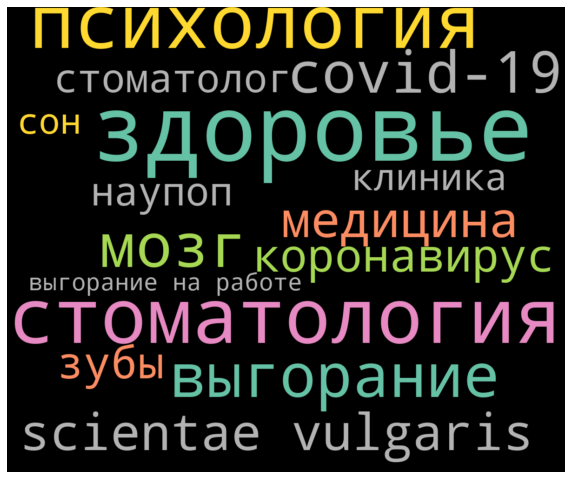

In [59]:
habr_tags_list = res.set_index('words').to_dict()['index']
# Генерируем облако Habr-Тегов
wordcloud_habr_tags = WordCloud(width = 1200, height = 1000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate_from_frequencies(habr_tags_list)

# Выводим на экран
plt.figure(figsize= (10, 10))
plt.imshow(wordcloud_habr_tags, interpolation= "bilinear")
plt.axis("off")
plt.show()


**Построить для ваших собранных статей облако тегов по названиям статей, исследовать самые популярные слова встречаемые в названиях статей**

In [60]:
# Чистим очень длинные связки слов, чтобы не переполнять облако слов
ArticleTags = df["Статья || Теги"].tolist()
ArticleTags_new = []
for articleList in ArticleTags:
      articleList = articleList.split(',')
      ArticleTags_new.append(articleList[0:2:])
Article_Tags_result = []
for li in ArticleTags_new:
  for elem in li:
    Article_Tags_result.append(elem)
ar_tags_df = pd.DataFrame(Article_Tags_result, columns= ["word"])
ar_tags_df = ar_tags_df.reset_index(0)
# Выводим DataFrame наиболее часто встречающихся слов
ar_res = ar_tags_df.groupby("word", as_index=False).count().sort_values("index", ascending= False).head(800)
ar_res

,word,index
150,научно-популярное,392
126,здоровье,324
204,читальный зал,105
80,блог компании белая радуга,71
29,биотехнологии,66
...,...,...
77,блог компании актион 360,1
76,блог компании автомакон,1
75,блог компании wrike,1
74,блог компании vk,1


Создаем маску для wordcloud

Импорт нужных библиотек

In [61]:
import numpy as np
from PIL import Image

**Создаем маску и выводим облако слов**

Приводим картинку к нужному виду для облака

In [62]:
image = Image.open("/content/cloud.png")
cloud_mask = np.array(image)

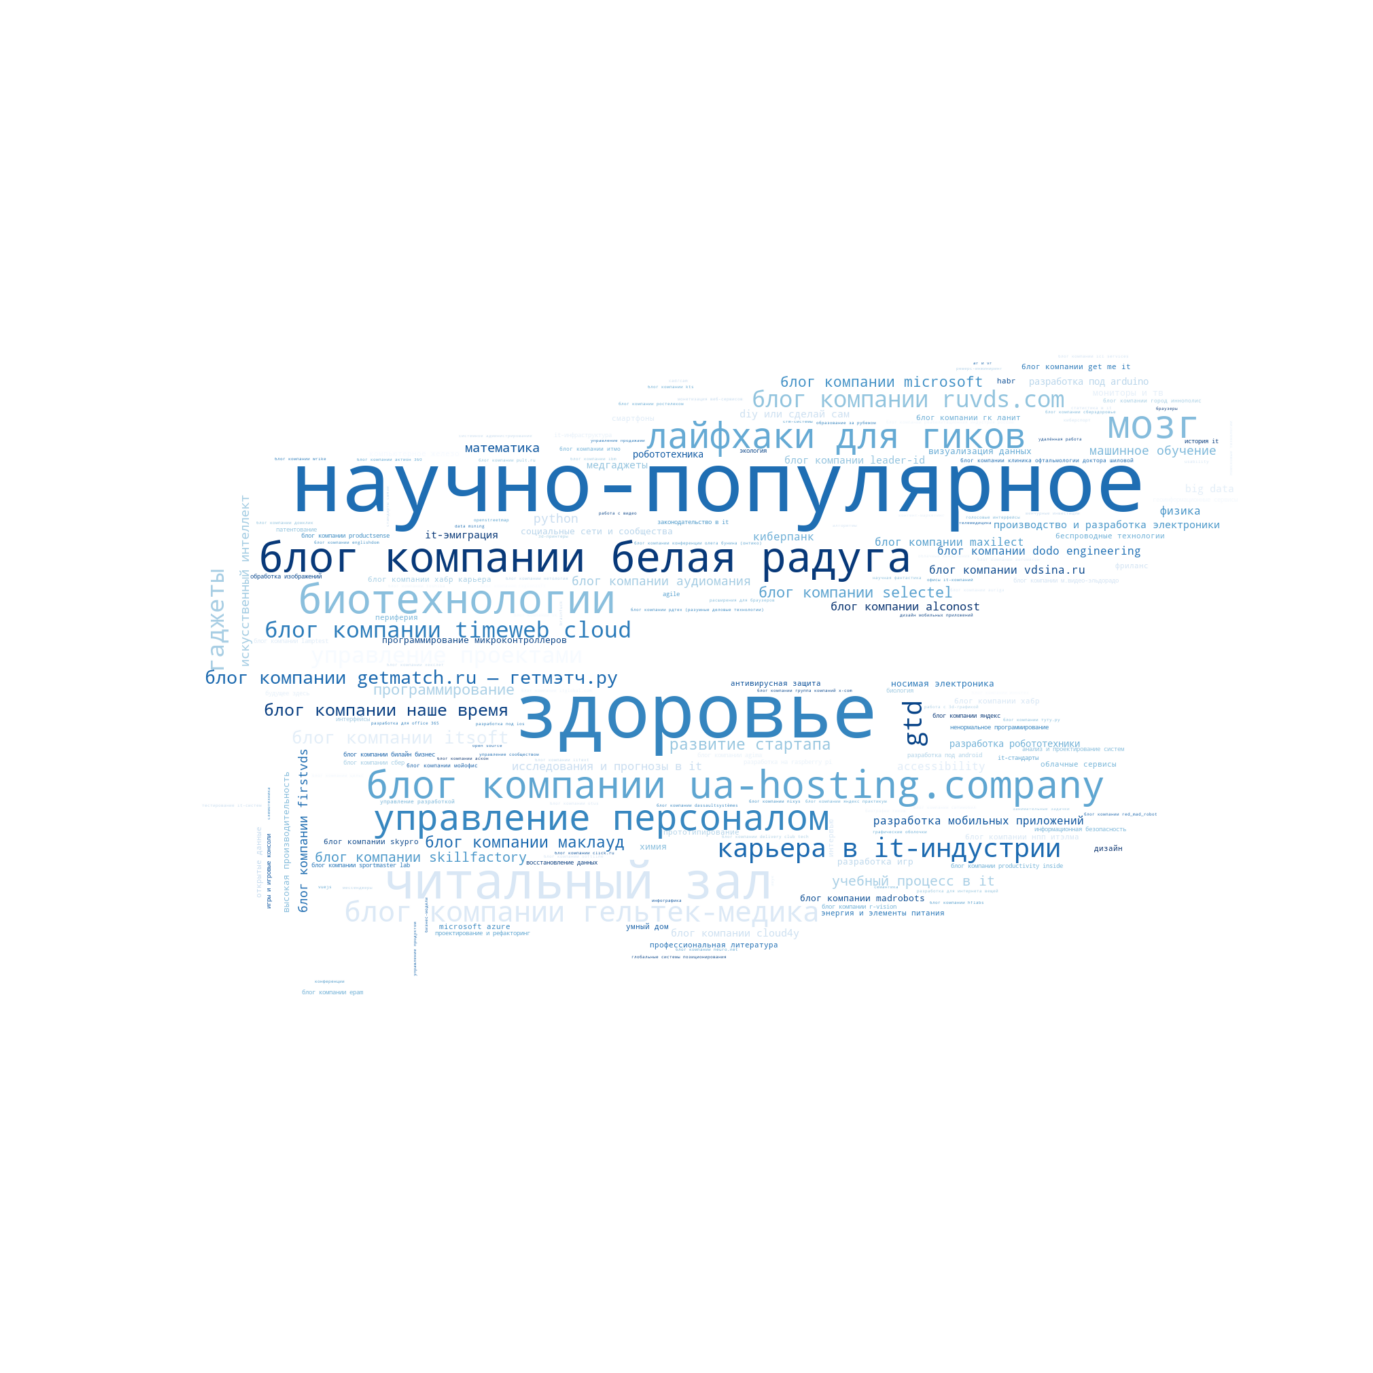

In [95]:
# Создаем shaped wordcloud
article_tags_list = ar_res.set_index('word').to_dict()['index']
# Генерируем облако Article-Тегов
wordcloud_article_tags = WordCloud(mask= cloud_mask,background_color= "white", colormap='Blues', max_words= 800).generate_from_frequencies(article_tags_list)

# Выводим на экран
plt.figure(figsize= (25, 25))
plt.imshow(wordcloud_article_tags, interpolation= "bilinear")
plt.axis("off")
plt.show()

**Цветовая палитра Habr**

In [85]:
# Импорт
import seaborn as sns

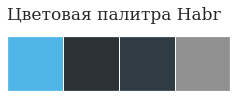

In [92]:
# Palette
sns.palplot(['#50b5e7', '#2c3135', '#303b44','#909090'])
plt.title("Цветовая палитра Habr",loc='left',fontfamily='serif',fontsize=17,y=1.2)
plt.show()

**Построить тепловую карту корреляции тегов**

Не понимаю, как это сделать

**Построить график по кол-ву статей и годам публикации, проанализировать его**

In [74]:
date_col = df['Дата публикации'].map(lambda x: x[:4:])
articles_col = df['Название']
articles_years_df = pd.concat([articles_col, date_col], axis = 1)
articles_years_df

,Название,Дата публикации
0,Meta* Quest 2 как фитнес-девайс. Мой опыт,2022
1,Как пережить эпоху перемен: советы по сохранен...,2022
2,Как справляться со стрессом в кризисное время,2022
3,Как удержать уровень стресса на приемлемом уро...,2022
4,Заметки о зубной эмали и зубной пасте,2022
...,...,...
986,"Основы медитации, или как научиться ничего не ...",2020
987,"I see… hey, stop moving: как зрительная систем...",2020
988,Телемедицина 2077: как киберпанк стал реальностью,2020
989,"ИИ и машинное обучение в медицине, ч.2",2020


Группирую по дате публикации

In [101]:
grouped_articles_years = articles_years_df.groupby('Дата публикации').count().reset_index(0)
grouped_articles_years

,Дата публикации,Название
0,2020,205
1,2021,489
2,2022,297


Строим график

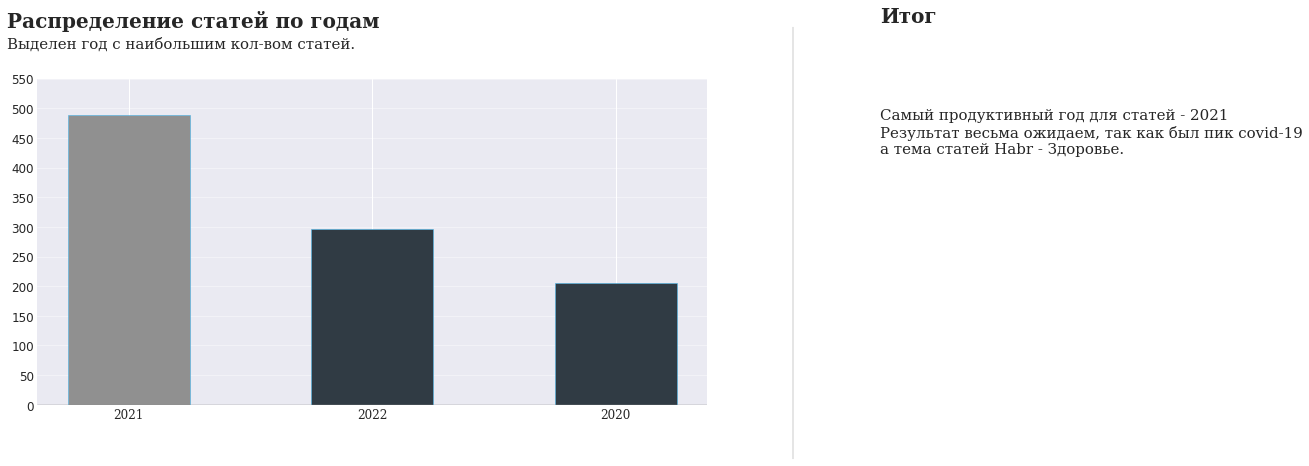

In [114]:
# Plot
grouped_articles_years_new = grouped_articles_years.groupby('Дата публикации')['Название'].sum().sort_values(ascending=False)
color_map = ['#303b44' for _ in range(3)]
color_map[0] = '#909090' # выделяемый цвет (год с наибольшим кол-вом статей)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(grouped_articles_years_new.index, grouped_articles_years_new, width=0.5, 
       edgecolor='#50b5e7', # Or darkgray
       linewidth=0.6,color=color_map)





# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(grouped_articles_years_new.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Распределение статей по годам', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделен год с наибольшим кол-вом статей.', fontsize=15, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=20, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
Самый продуктивный год для статей - 2021
Результат весьма ожидаем, так как был пик covid-19
а тема статей Habr - Здоровье.
'''
         , fontsize=15, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 600, 50) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

**Проанализировать в какие месяцы публикаций было больше**

In [130]:
months_col = df['Дата публикации'].map(lambda x: x[5:7:]).map(lambda x: int(x))
articles_col_2 = df['Название']
articles_years_df_2 = pd.concat([articles_col_2, months_col], axis = 1)
articles_years_df_2.rename(columns= {'Дата публикации': 'Месяц публикации'}, inplace=True)

# Создаем словарь месяцев
months_dict = {
    1 : "January",
    2 : "February",
    3 : "March",
    4 : "April",
    5 : "May",
    6 : "June",
    7 : "July",
    8 : "August",
    9 : "September",
    10 : "October",
    11 : "November",
    12 : "December"
}
articles_years_df_2["Месяц публикации"].replace(months_dict, inplace = True)
# Выводим список
articles_years_df_2

,Название,Месяц публикации
0,Meta* Quest 2 как фитнес-девайс. Мой опыт,October
1,Как пережить эпоху перемен: советы по сохранен...,September
2,Как справляться со стрессом в кризисное время,September
3,Как удержать уровень стресса на приемлемом уро...,September
4,Заметки о зубной эмали и зубной пасте,September
...,...,...
986,"Основы медитации, или как научиться ничего не ...",June
987,"I see… hey, stop moving: как зрительная систем...",June
988,Телемедицина 2077: как киберпанк стал реальностью,June
989,"ИИ и машинное обучение в медицине, ч.2",June


In [161]:
# Считаем сколько статей вышло в каждый месяц суммарно за три года
grouped_articles_months = articles_years_df_2.groupby('Месяц публикации').count() \
                                                                         .sort_values("Название", ascending= False) \
                                                                         .reset_index(0)
grouped_articles_months

,Месяц публикации,Название
0,July,109
1,May,97
2,December,93
3,September,93
4,June,92
5,August,89
6,November,87
7,April,86
8,February,62
9,October,62


**Рисуем график**

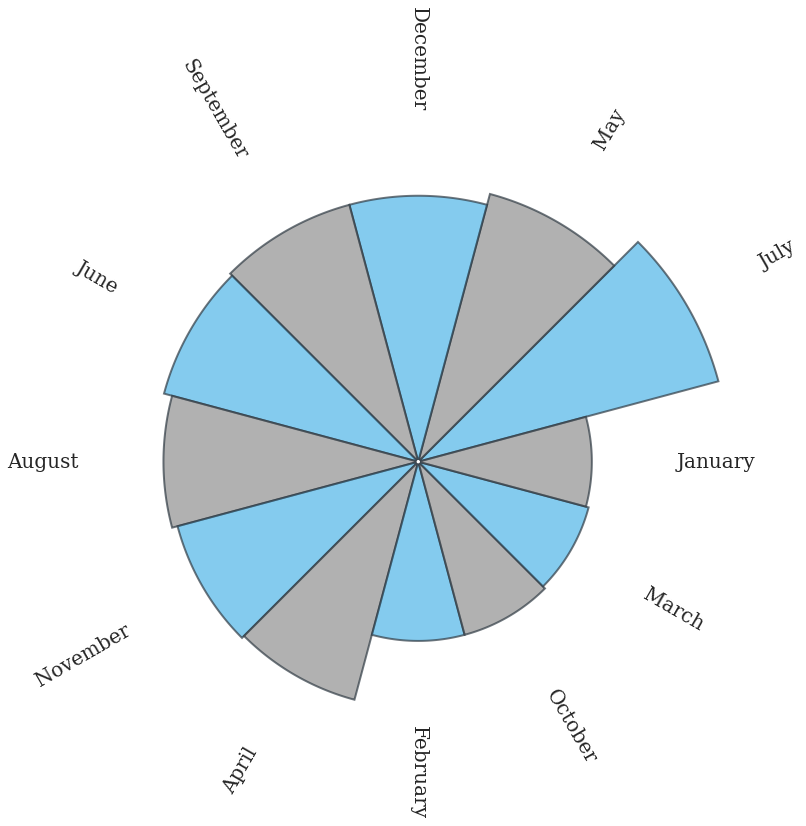

In [162]:
# initialize the figure
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = grouped_articles_months['Название'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * grouped_articles_months.Название + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(grouped_articles_months.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(grouped_articles_months.index)+1))
angles = [element * width for element in indexes]
angles

color_map = ['#909090' for _ in range(2)]
color_map[0] = '#50b5e7'
# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="#303b44",
    color=color_map,alpha=0.7
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, grouped_articles_months["Месяц публикации"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=20,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 